<a href="https://colab.research.google.com/github/ELBITI/Diabetes-Prediction-KNN/blob/main/knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd


df = pd.read_csv('diabetes.csv')

dimension  = df.shape

df.dropna()
df.drop_duplicates()

resumer = df.info()

caracteristique = df.describe()

occu = df['Outcome'].value_counts()


print('1. la dimension : ', dimension )

print('\n2. Resumer de donner: ', resumer )

print('\n3. Caracteristique descriptive: ', caracteristique )
print('\n4. Occurence par classe: ', occu )






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   767 non-null    int64  
 1   BloodPressure             767 non-null    int64  
 2   Insulin                   767 non-null    int64  
 3   BMI                       767 non-null    float64
 4   DiabetesPedigreeFunction  767 non-null    float64
 5   Age                       767 non-null    int64  
 6   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB
1. la dimension :  (767, 7)

2. Resumer de donner:  None

3. Caracteristique descriptive:            Glucose  BloodPressure     Insulin         BMI  \
count  767.000000     767.000000  767.000000  767.000000   
mean   120.930900      69.104302   79.903520   31.994654   
std     31.977581      19.368410  115.283105    7.889095   
min      0.000000  

Model (k=1) : [train: 1.0, test: 0.69140625] 


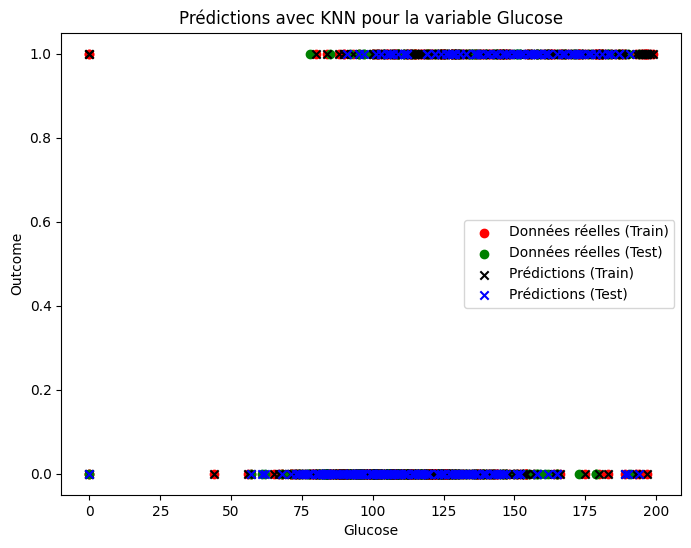

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


X = df.drop(columns=['Outcome'])  # Toutes les variables sauf 'Outcome'
Y = df['Outcome']  # Variable cible (Outcome)

# Séparation des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Initialisation du modèle KNN
n = 1
model = KNeighborsClassifier(n_neighbors=n)
model.fit(X_train, y_train)

# Prédiction sur les ensembles d'entraînement et de test
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

# Calcul de l'accuracy pour l'ensemble de test et d'entraînement
accuracy_score_test = accuracy_score(y_test, y_predict_test)
accuracy_score_train = accuracy_score(y_train, y_predict_train)

print(f"Model (k={n}) : [train: {accuracy_score_train}, test: {accuracy_score_test}] ")


X_train_glucose = X_train[['Glucose']]
X_test_glucose = X_test[['Glucose']]

plt.figure(figsize=(8,6))

# Affichage des données réelles pour 'Glucose' (ensemble d'entraînement)
plt.scatter(X_train_glucose, y_train, color='r', label="Données réelles (Train)")

# Affichage des données réelles pour 'Glucose' (ensemble de test)
plt.scatter(X_test_glucose, y_test, color='g', label="Données réelles (Test)")

# Affichage des prédictions pour 'Glucose' (ensemble d'entraînement)
plt.scatter(X_train_glucose, y_predict_train, color='black', marker='x', label="Prédictions (Train)")

# Affichage des prédictions pour 'Glucose' (ensemble de test)
plt.scatter(X_test_glucose, y_predict_test, color='blue', marker='x', label="Prédictions (Test)")

# Ajouter une légende et des labels
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Prédictions avec KNN pour la variable Glucose')

# Affichage du graphique
plt.show()
